<a href="https://colab.research.google.com/github/congthuc521/Vo_Cong_Thuc_19146272/blob/main/identify_sound_of_animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.layers import Conv2D, MaxPool2D, Flatten
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tfa
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=0.2, horizontal_flip=True, vertical_flip=True, zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1/255)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/sound_of_animals/training_data',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical',
                                               subset = 'training',
                                               shuffle = True)
validation_set=train_datagen.flow_from_directory('/content/drive/MyDrive/sound_of_animals/training_data',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical',
                                               subset = 'validation',
                                               shuffle = True)
test_set=train_datagen.flow_from_directory('/content/drive/MyDrive/sound_of_animals/testing_data',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 133 images belonging to 10 classes.
Found 0 images belonging to 10 classes.
Found 10 images belonging to 10 classes.


In [84]:
train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=0.2, horizontal_flip=True, vertical_flip=True, zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1/255)

In [87]:
from keras.models import Sequential
model=Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                                        padding='same', input_shape=(150,150,3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
                                        padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                                        padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                                        padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                                        padding='same'))
model.add(MaxPooling2D((2, 2)))

from keras.layers import Flatten
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
from tensorflow.keras.optimizers import SGD

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
                                        metrics=['accuracy'])
history = model.fit(training_set,epochs=200,batch_size=64,
                                  validation_data=validation_set,verbose=1)

Epoch 1/200
5/5 [==============================] - 2s 206ms/step - loss: 23.2494 - accuracy: 0.2180
Epoch 2/200
5/5 [==============================] - 1s 194ms/step - loss: 2.2624 - accuracy: 0.2632
Epoch 3/200
5/5 [==============================] - 1s 196ms/step - loss: 2.0771 - accuracy: 0.2782
Epoch 4/200
5/5 [==============================] - 1s 261ms/step - loss: 2.0869 - accuracy: 0.2857
Epoch 5/200
5/5 [==============================] - 1s 198ms/step - loss: 1.8418 - accuracy: 0.3835
Epoch 6/200
5/5 [==============================] - 1s 357ms/step - loss: 2.1356 - accuracy: 0.2857
Epoch 7/200
5/5 [==============================] - 2s 455ms/step - loss: 2.0687 - accuracy: 0.3233
Epoch 8/200
5/5 [==============================] - 1s 194ms/step - loss: 1.9235 - accuracy: 0.3383
Epoch 9/200
5/5 [==============================] - 1s 197ms/step - loss: 1.7642 - accuracy: 0.4211
Epoch 10/200
5/5 [==============================] - 1s 261ms/step - loss: 1.8049 - accuracy: 0.4060
Epoch 11

In [88]:
training_set.class_indices

{'bo': 0,
 'cat': 1,
 'chao mao': 2,
 'cho': 3,
 'cop': 4,
 'de': 5,
 'de_be': 6,
 'heo': 7,
 'vit': 8,
 'voi': 9}

In [90]:
model.save("thuc.h5")

array([2])

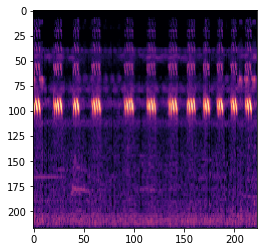

In [91]:
from matplotlib.image import imread 
results={'bo': 0,
 'cat ': 1,
 'chao mao': 2,
 'cho': 3,
 'cop': 4,
 'de': 5,
 'de_be': 6,
 'heo': 7,
 'vit': 8,
 'voi': 9}
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt 
import numpy as np
img = load_img('/content/drive/MyDrive/sound_of_animals/testing_data/de/de.png', 
                                target_size = (150,150))
#imshow('test.jpg')
image = imread('/content/drive/MyDrive/sound_of_animals/testing_data/de/de.png')
plt.imshow(image);
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = 1)

array([7])

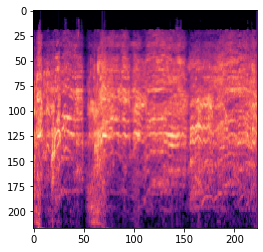

In [92]:
from matplotlib.image import imread 
results={'bo': 0,
 'cat ': 1,
 'chao mao': 2,
 'cho': 3,
 'cop': 4,
 'de': 5,
 'de_be': 6,
 'heo': 7,
 'vit': 8,
 'voi': 9}
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt 
import numpy as np
img = load_img('/content/drive/MyDrive/sound_of_animals/testing_data/heo/heo.png', 
                                          target_size = (150,150))
#imshow('test.jpg')
image = imread('/content/drive/MyDrive/sound_of_animals/testing_data/heo/heo.png')
plt.imshow(image);
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = 1)

array([6])

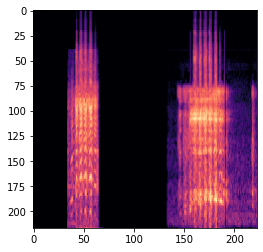

In [93]:
from matplotlib.image import imread 
results={'bo': 0,
 'cat ': 1,
 'chao mao': 2,
 'cho': 3,
 'cop': 4,
 'de': 5,
 'de_be': 6,
 'heo': 7,
 'vit': 8,
 'voi': 9}
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt 
import numpy as np
img = load_img('/content/drive/MyDrive/sound_of_animals/testing_data/de_be/de_be.png', 
                                        target_size = (150,150))
#imshow('test.jpg')
image = imread('/content/drive/MyDrive/sound_of_animals/testing_data/de_be/de_be.png')
plt.imshow(image);
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = 1)

array([6])

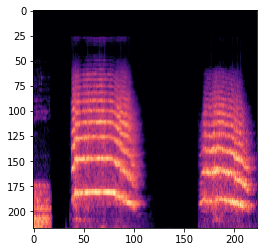

In [94]:
img = load_img('/content/drive/MyDrive/sound_of_animals/testing_data/voi/voi.png',
                                                target_size = (150,150))
#imshow('test.jpg')
image = imread('/content/drive/MyDrive/sound_of_animals/testing_data/voi/voi.png')
plt.imshow(image);
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = 1)

array([9])

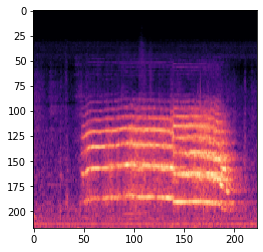

In [95]:
img = load_img('123456.png', target_size = (150,150))
#imshow('test.jpg')
image = imread('123456.png')
plt.imshow(image);
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = 1)

array([3])

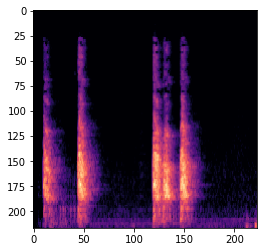

In [96]:
img = load_img('cho.png', target_size = (150,150))
#imshow('test.jpg')
image = imread('cho.png')
plt.imshow(image);
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = 1)

array([3])

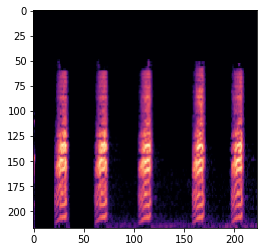

In [98]:
img = load_img('vit.png', target_size = (150,150))
#imshow('test.jpg')
image = imread('vit.png')
plt.imshow(image);
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = 1)

array([0])

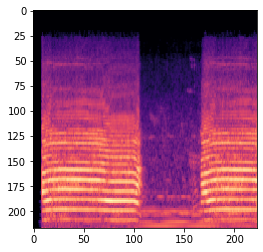

In [99]:
img = load_img('bo.png', target_size = (150,150))
#imshow('test.jpg')
image = imread('bo.png')
plt.imshow(image);
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = 1)

array([6])

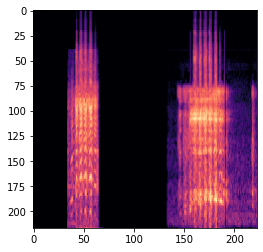

In [100]:
img = load_img('de_be.png', target_size = (150,150))
#imshow('test.jpg')
image = imread('de_be.png')
plt.imshow(image);
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = 1)

array([7])

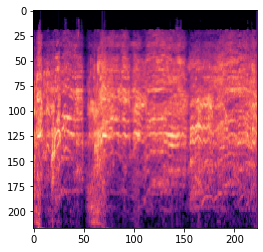

In [101]:
img = load_img('heo.png', target_size = (150,150))
#imshow('test.jpg')
image = imread('heo.png')
plt.imshow(image);
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = 1)